## Observations and Insights 

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
merge_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [18]:
# Checking the number of mice.
mouse_count = merge_df["Mouse ID"].count()
mouse_count

1893

In [19]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [20]:
# Optional: Get all the data for the duplicate mouse ID. 
all_mice = merge_df[merge_df.duplicated(['Mouse ID',])]
all_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
250,a275,5,46.795257,0,Ceftamin,Female,20,28
251,w575,5,48.913860,1,Zoniferol,Female,16,28
252,x822,5,45.671104,1,Ceftamin,Male,3,29
253,l509,5,45.851193,0,Capomulin,Male,17,21
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop_duplicates("Mouse ID")
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [25]:
# Checking the number of mice in the clean DataFrame.
mouse_count_2 = merge_df["Mouse ID"].count()
mouse_count_2


1893

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": std, "SEM": sem})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

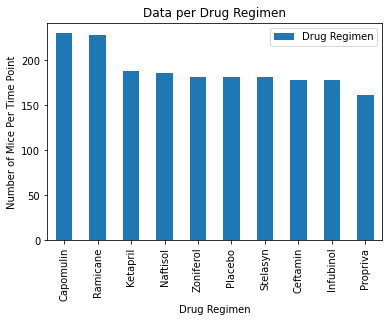

<Figure size 432x288 with 0 Axes>

In [29]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drugs_mice = pd.DataFrame(pd.value_counts(merge_df["Drug Regimen"]))

%matplotlib inline
# pandas plot
drugs_mice.plot(kind = "bar")
plt.title("Data per Drug Regimen")
plt.ylabel("Number of Mice Per Time Point")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

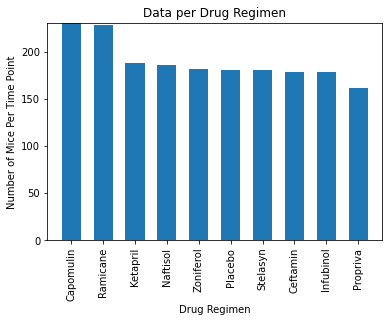

In [32]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = merge_df["Drug Regimen"].value_counts().index
y_axis = merge_df["Drug Regimen"].value_counts()
plt.bar(x_axis,y_axis, width = .6)
plt.xticks(x_axis, rotation = 90)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+0.4)
plt.ylabel("Number of Mice Per Time Point")
plt.xlabel("Drug Regimen")
plt.title("Data per Drug Regimen")
plt.show()


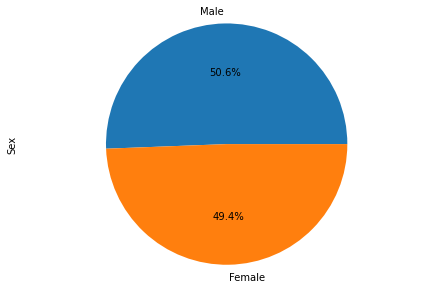

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = pd.value_counts(merge_df['Sex'])

#pandas pie plot
gender_pandas = mice_gender.plot(kind="pie", y="sex", autopct='%1.1f%%')
gender_pandas.set_ylabel("Sex")

plt.tight_layout()
plt.axis("equal")
plt.show()


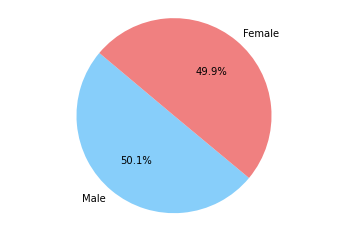

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sizes = [325, 324]
plt.pie(
    sizes, 
    labels=["Male","Female"],          
    colors=["lightskyblue","lightcoral"],
    autopct='%1.1f%%',                                         # Formats percentages
    startangle=140
)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

best_regimes = merge_df[merge_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)
best_regimes

best_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

best_regimes_data

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
best_regimens_sort = best_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_regimens_sort.head()


Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
Name: Tumor Volume (mm3), dtype: float64

In [58]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for treatment in treatments:
    
    #Locate the rows which contain mice on each drug and get the tumor volumes 
    
    drug_df = merge_df.loc[merge_df['Drug Regimen'] == treatment]
    
    #add subset 
    
    final_volume_df = drug_df.loc[drug_df['Timepoint'] == drug_df['max_timepoint']]
    
    #create a series that lists all final tumor values
    values = final_volume_df['Tumor Volume (mm3)']
    
    tumor_vol_data.append(values)
    
    
    
    # Determine outliers using upper and lower bounds
    quartiles = values.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
    print(f'IQR for {treatment}: {iqr}')
    
    #find upper and lower bounds to identify outliers
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f'Lower Bound for {treatment}: {lower_bound}')
    print(f'Upper Bound for {treatment}: {upper_bound}')
    
    #Check for ouliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) |
                                (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    
    print(f'Number of {treatment} outliers: {outliers_count}')

KeyError: 'max_timepoint'

NameError: name 'capo_obj' is not defined

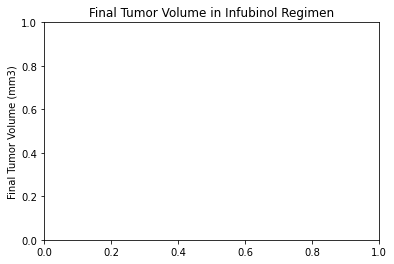

In [57]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Infubinol Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(capo_obj)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

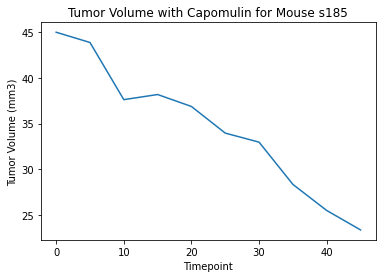

In [40]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = merge_df.loc[merge_df["Mouse ID"]== "s185"]
x_axis = x_axis["Timepoint"]

y_axis = merge_df.loc[merge_df["Mouse ID"]== "s185"]
y_axis = y_axis["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.title("Tumor Volume with Capomulin for Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

In [53]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_scatter = merge_df[merge_df["Drug Regimen"].isin(["Capomulin"])]

capomulin_scatter_df = best_regimes[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

capomulin_sorted = capomulin_scatter_plot.sort_values(["Weight (g)"], ascending=True)

capomulin_scatter_plot = capomulin_scatter.reset_index()

capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()


NameError: name 'capomulin_scatter_plot' is not defined

## Correlation and Regression

In [51]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = capo_grouped_plot["Weight (g)"]
y_values = capo_grouped_plot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()

NameError: name 'capo_grouped_plot' is not defined